<a href="https://colab.research.google.com/github/pu-bi/ITB-2022/blob/main/ITB_vis_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IT와비즈니스혁신
### 데이터 시각화 실습과제
홍보광고학과 1813142 박현영

---

## 라이브러리와 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/mining-main/health_data.csv")
df

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021


## 데이터 전처리 및 들여다보기

필요없는 데이터라고 생각되는 기준년도와 데이터공개일자 열을 drop 함수를 이용하여 삭제

In [5]:
df = df.drop(columns = '기준년도')

In [6]:
df = df.drop(columns = '데이터공개일자')

In [7]:
df

,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,1,36,M,9,165,60,72.1,1.2,1.5,1,...,1.0,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN
1,2,27,F,13,150,65,81.0,0.8,0.8,1,...,1.0,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN
2,3,11,F,12,155,55,70.0,0.6,0.7,1,...,1.0,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN
3,4,31,M,13,160,70,90.8,1.0,1.0,1,...,1.0,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0
4,5,41,F,12,155,50,75.2,1.5,1.2,1,...,1.0,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,44,F,13,155,55,83.0,1.2,1.2,1,...,1.0,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN
9996,9997,43,F,11,160,55,77.5,1.0,1.2,1,...,1.0,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0
9997,9998,45,M,12,160,80,93.0,0.6,0.6,1,...,1.0,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN
9998,9999,27,F,15,155,55,78.0,0.6,1.0,1,...,NaN,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN


In [8]:
df.shape

(10000, 29)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   가입자일련번호      10000 non-null  int64  
 1   시도코드         10000 non-null  int64  
 2   성별코드         10000 non-null  object 
 3   연령대코드(5세단위)  10000 non-null  int64  
 4   신장(5Cm단위)    10000 non-null  int64  
 5   체중(5Kg 단위)   10000 non-null  int64  
 6   허리둘레         10000 non-null  float64
 7   시력(좌)        10000 non-null  float64
 8   시력(우)        10000 non-null  float64
 9   청력(좌)        10000 non-null  int64  
 10  청력(우)        10000 non-null  int64  
 11  수축기혈압        9912 non-null   float64
 12  이완기혈압        9912 non-null   float64
 13  식전혈당(공복혈당)   9912 non-null   float64
 14  총콜레스테롤       4044 non-null   float64
 15  트리글리세라이드     4044 non-null   float64
 16  HDL콜레스테롤     4044 non-null   float64
 17  LDL콜레스테롤     3977 non-null   float64
 18  혈색소          9912 non-null   float64
 19  요단백  

In [10]:
df.describe()

,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,5000.50000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,1.045200,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,2886.89568,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,0.218545,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,1.00000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2500.75000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,5000.50000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,7500.25000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,10000.00000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


연령대코드(5세단위) 열의 min 값이 9(40~44세 연령대)라는 것을 확인하고 분석 시에 이러한 사실도 고려하게 되었음

---




## 1. 흡연 경험자와 비경험자의 구강검진 선택 비율 및 충치, 치석 보유 비교

In [11]:
#필요한 열만 추출하여 새로운 데이터 프레임 생성
df_tabaco = df[['성별코드','연령대코드(5세단위)','흡연상태','구강검진수검여부','치아우식증유무','치석']]

In [12]:
df_tabaco = df_tabaco.rename(columns = {'흡연상태':'smoking state'})
df_tabaco = df_tabaco.rename(columns = {'구강검진수검여부':'dental'})
df_tabaco = df_tabaco.rename(columns = {'치아우식증유무':'caries'})
df_tabaco = df_tabaco.rename(columns = {'치석':'calculus'})

In [13]:
# 흡연상태의 Yes와 NotNow를 합쳐 흡연경험 열 생성
df_tabaco['experience'] = df_tabaco['smoking state']

In [14]:
df_tabaco['experience'].replace('NotNow', 'Yes',inplace=True)

In [15]:
df_tabaco

,성별코드,연령대코드(5세단위),smoking state,dental,caries,calculus,experience
0,M,9,No,0,NaN,NaN,No
1,F,13,No,0,NaN,NaN,No
2,F,12,No,0,NaN,NaN,No
3,M,13,No,1,0.0,0.0,No
4,F,12,No,0,NaN,NaN,No
...,...,...,...,...,...,...,...
9995,F,13,No,0,NaN,NaN,No
9996,F,11,No,1,0.0,0.0,No
9997,M,12,No,0,NaN,NaN,No
9998,F,15,No,0,NaN,NaN,No


In [16]:
print(sum(df_tabaco['smoking state']=='Yes'))
print(sum(df_tabaco['smoking state']=='NotNow'))

print(1841+1926) #experience == Yes 값이 잘 만들어졌는지 확인

1841
1926
3767


In [17]:
sum(df_tabaco['experience']=='Yes')

3767

In [18]:
df_tabaco.groupby(by='experience').mean()

,연령대코드(5세단위),dental,caries,calculus
experience,,,,
No,12.163377,0.293853,0.140907,0.535773
Yes,11.547385,0.376958,0.219718,0.635915


#### 그래프 만들기

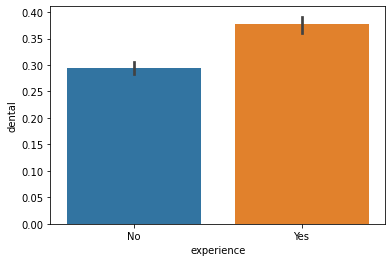

In [19]:
sns.barplot(data=df_tabaco, x= 'experience', y= 'dental')

1: 흡연경험자와 비경험자의 구강검진 수검여부 선택 비율 그래프

흡연 경험자 (Yes = (Yes + Not Now)) 의 구강검진 수검여부 평균값이 흡연 미경험자(No) 보다  높게 나타났다.

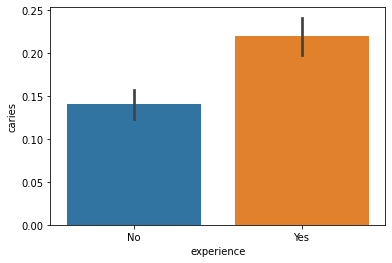

In [20]:
sns.barplot(data=df_tabaco, x='experience', y= 'caries')

2: 흡연경험자와 비경험자의 충치 보유 여부 비율 그래프

흡연 경험자 (Yes = (Yes + Not Now)) 의 충치 보유 평균값이 흡연 미경험자(No) 보다 높게 나타났다.

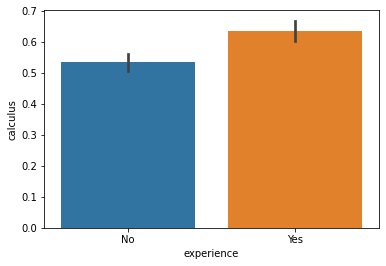

In [21]:
sns.barplot(data=df_tabaco, x='experience', y='calculus')

3: 흡연경험자와 비경험자의 치석 보유 여부 비율 그래프

흡연 경험자 (Yes = (Yes + Not Now)) 의 치석 보유 평균값이 흡연 미경험자(No) 보다 높게 나타났다.

### 흡연 경험을 기준으로 구강검진여부와 충치, 치석 보유량의 평균을 내고, 이를 그래프화 해보니...



구강검진 수검, 충치 보유, 치석 보유 여부 모든 면에서

흡연 경험자 (Yes = (Yes + Not Now))가  흡연 미경험자(No) 보다 높은 값을 가진다는 것을 확인할 수 있었다.

그래프 비교를 통해 담배는 구강건강에 해롭다는 사실을 한 눈에 파악할 수 있었다.

---

## 2. 시력이 급격히 나빠지는 연령구간은 어디?

In [22]:
df_see = df[['연령대코드(5세단위)','성별코드','시력(좌)','시력(우)']]

In [23]:
df_see['시력평균'] = (df['시력(좌)']+df['시력(우)'])/2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_see['시력평균']

0       1.35
1       0.80
2       0.65
3       1.00
4       1.35
        ... 
9995    1.20
9996    1.10
9997    0.60
9998    0.80
9999    0.50
Name: 시력평균, Length: 10000, dtype: float64

In [25]:
df_see = df_see.rename(columns = {'연령대코드(5세단위)':'age'})
df_see = df_see.rename(columns = {'시력평균':'see_mean'})

In [26]:
df_see['age'] = df_see['age'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], ['0~4', '5~9', '10~14', '15~19', '20~24', '25~29', '30~34', '35~39', '40~44', '45~49', '50~54', '55~59', '60~64', '65~69', '70~74', '75~79', '80~84', '85+'])

In [27]:
mean_see = df_see.groupby(df_see['age'])['see_mean'].mean().to_frame().sort_values(by='age')

#### 그래프 그리기

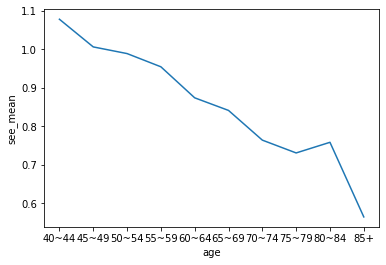

In [28]:
sns.lineplot(data = mean_see, x = mean_see.index ,y="see_mean")

### 연령을 기준으로 시력 평균을 내고, 이를 그래프화 해보니...

평균 시력이 '80~84 연령대'에서 급격히 감소하는 모양을 보였다.

따라서 '80~84'연령대에 들어서서 눈이 살짝 침침해지더라도 일반적으로 일어나는 일이니 크게 놀라지 않아도 되겠다.

---

## 3. BMI 지수에 따른 허리둘레

In [29]:
df_bmi = df[['신장(5Cm단위)','체중(5Kg 단위)','허리둘레']]

In [30]:
df_bmi = df_bmi.rename(columns = {'허리둘레':'waist'})

In [31]:
df_bmi['bmi'] = df_bmi['체중(5Kg 단위)']/((df_bmi['신장(5Cm단위)']/100)**2)

In [32]:
df_bmi['bmi']

0       22.038567
1       28.888889
2       22.892820
3       27.343750
4       20.811655
          ...    
9995    22.892820
9996    21.484375
9997    31.250000
9998    22.892820
9999    29.296875
Name: bmi, Length: 10000, dtype: float64

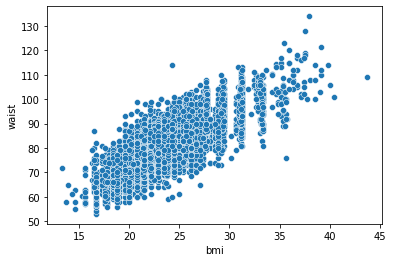

In [33]:
sns.scatterplot(data=df_bmi, x= 'bmi', y='waist')

### bmi 지수와 허리 둘레의 관계를 그래프화 해보니...

bmi지수는 신장과 체중만이 반영되어 있는 지수이기 때문에 근육의 무게 등은 고려되지 않는다는 한계가 있다.

하지만 위 그래프를 보면 bmi지수와 허리둘레의 비례관계 확인이 가능하며

bmi지수가 일반적으로 비만도 측정에 활용될 수 있다는 사실을 뒷받침하는 근거도 될 수 있겠다. 

또한 bmi가 설명할 수 없는 일부 경우는 무시할만하다고 생각된다.